In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/a-large-scale-fish-dataset/Segmentation_example_script.m
/kaggle/input/a-large-scale-fish-dataset/README.txt
/kaggle/input/a-large-scale-fish-dataset/license.txt
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00033.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00004.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00023.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00041.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00024.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00035.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00045.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00038.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00025.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/0000

In [2]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping

# Adım 1: Verileri DataFrame'e dönüştürme

In [3]:
label = []
path = []
fish_dir = '../input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'
for dir_name, _, filenames in os.walk(fish_dir):
    for filename in filenames:
        if os.path.splitext(filename)[-1] == '.png':
            if dir_name.split()[-1] != 'GT':
                label.append(os.path.split(dir_name)[1])
                path.append(os.path.join(dir_name, filename))

data = pd.DataFrame(columns=['path', 'label'])
data['path'] = path
data['label'] = label

# Adım 2: Verileri görselleştirme

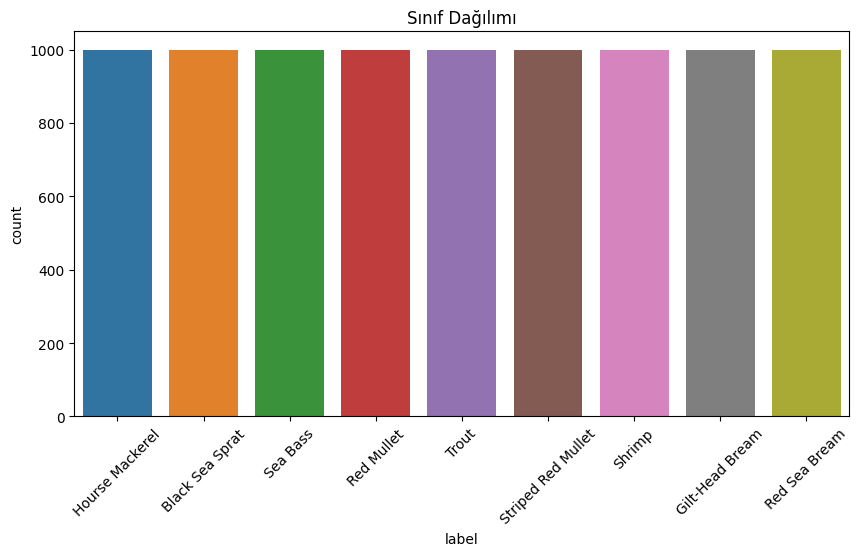

In [4]:
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=data)
plt.title('Sınıf Dağılımı')
plt.xticks(rotation=45)
plt.show()

# Adım 3: Verileri yükleme ve önişleme

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    fish_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    fish_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  
)

Found 14400 images belonging to 9 classes.
Found 3600 images belonging to 9 classes.


# Adım 4: Derin öğrenme modelini oluşturma (ANN)

In [6]:
model = Sequential([
    Input(shape=(150, 150, 3)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.2),  # Dropout katmanı eklendi
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

# Adım 5: Modeli eğitme

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Early stopping ekleyelim
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,  # Epoch sayısını artıralım
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping]  # Early stopping callback'ini ekleyelim
)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


450/450 ━━━━━━━━━━━━━━━━━━━━ 392s 860ms/step - accuracy: 0.1955 - loss: 3.5547 - val_accuracy: 0.2355 - val_loss: 2.0611
Epoch 2/20


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3125 - val_loss: 1.8449
Epoch 3/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 303s 668ms/step - accuracy: 0.3504 - loss: 1.6552 - val_accuracy: 0.2528 - val_loss: 2.3382
Epoch 4/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1875 - val_loss: 2.5526
Epoch 5/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 304s 670ms/step - accuracy: 0.4267 - loss: 1.4863 - val_accuracy: 0.3276 - val_loss: 1.8435
Epoch 6/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1250 - val_loss: 2.3497
Epoch 7/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 304s 670ms/step - accuracy: 0.4533 - loss: 1.4170 - val_accuracy: 0.2888 - val_loss: 1.9969
Epoch 8/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0625 - val_loss: 2.5440


# Adım 6: Modeli değerlendirme

In [8]:
test_loss, test_acc = model.evaluate(validation_generator)
print('Test accuracy:', test_acc)

113/113 ━━━━━━━━━━━━━━━━━━━━ 59s 524ms/step - accuracy: 0.2868 - loss: 1.9866
Test accuracy: 0.28083333373069763


# Adım 7: Hiperparametre optimizasyonu
# Keras Tuner gibi bir kütüphane kullanarak hiperparametre optimizasyonu yapabilirsiniz.

In [9]:
from tensorflow.keras.optimizers import Adam, RMSprop

optimizers = [Adam(learning_rate=0.001), Adam(learning_rate=0.01), RMSprop()]
for optimizer in optimizers:
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples  
 // train_generator.batch_size,
        epochs=30,  
  # Epoch sayısını artıralım
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // validation_generator.batch_size,
        callbacks=[early_stopping]  
  # Early stopping callback'ini ekleyelim
    )
    # modelin performansını değerlendirme
    test_loss, test_acc = model.evaluate(validation_generator)
    print('Optimizer:', optimizer)
    print('Test accuracy:', test_acc)

Epoch 1/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 307s 673ms/step - accuracy: 0.4672 - loss: 1.3787 - val_accuracy: 0.3072 - val_loss: 2.3586
Epoch 2/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2500 - val_loss: 2.1100
Epoch 3/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 327s 684ms/step - accuracy: 0.5003 - loss: 1.3077 - val_accuracy: 0.3379 - val_loss: 2.2144
113/113 ━━━━━━━━━━━━━━━━━━━━ 60s 529ms/step - accuracy: 0.3271 - loss: 2.2586
Optimizer: <keras.src.optimizers.adam.Adam object at 0x78aa541bf250>
Test accuracy: 0.3352777659893036
Epoch 1/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 310s 680ms/step - accuracy: 0.1905 - loss: 2.2791 - val_accuracy: 0.1646 - val_loss: 2.1561
Epoch 2/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0625 - val_loss: 2.2947
Epoch 3/30
450/450 ━━━━━━━━━━━━━━━━━━━━ 307s 677ms/step - accuracy: 0.2152 - loss: 1.9572 - val_accuracy: 0.1557 - val_loss: 2.1093
113/113 ━━━━━━━

# Adım 8: Confusion matrix ve classification report

113/113 ━━━━━━━━━━━━━━━━━━━━ 60s 530ms/step


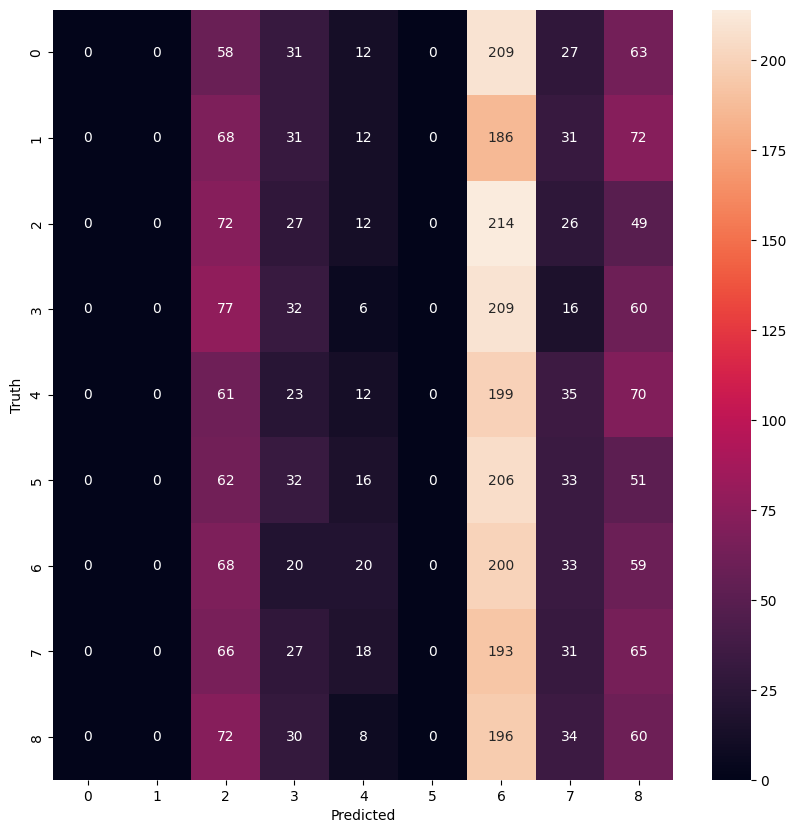

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       400
           1       0.00      0.00      0.00       400
           2       0.12      0.18      0.14       400
           3       0.13      0.08      0.10       400
           4       0.10      0.03      0.05       400
           5       0.00      0.00      0.00       400
           6       0.11      0.50      0.18       400
           7       0.12      0.08      0.09       400
           8       0.11      0.15      0.13       400

    accuracy                           0.11      3600
   macro avg       0.08      0.11      0.08      3600
weighted avg       0.08      0.11      0.08      3600



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

print(classification_report(validation_generator.classes, y_pred))

# Adım 9: Accuracy ve Loss Grafikleri

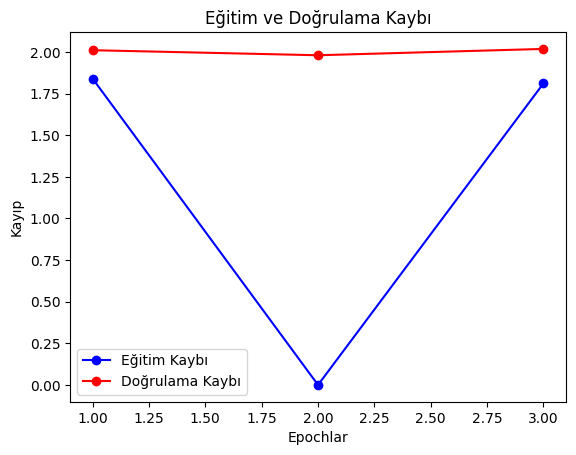

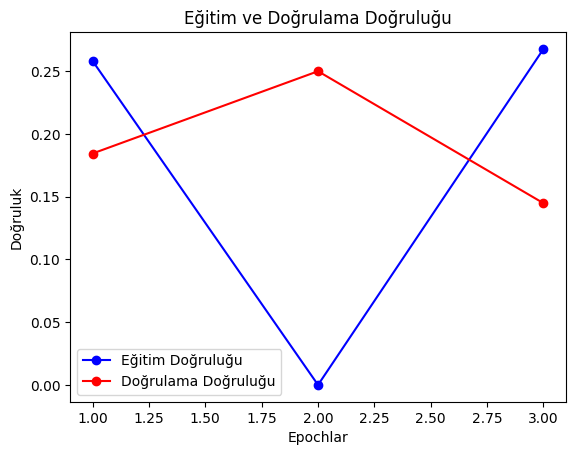

In [11]:
# Eğitim sürecindeki kayıp ve doğruluk değerlerini al
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']  


# Epoch sayısını al
epochs = range(1, len(train_loss) + 1)

# Kayıp grafiğini çiz
plt.plot(epochs, train_loss, 'bo-', label='Eğitim Kaybı')
plt.plot(epochs, val_loss, 'ro-', label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochlar')  

plt.ylabel('Kayıp')
plt.legend()

# Doğruluk grafiğini çiz
plt.figure()
plt.plot(epochs, train_acc, 'bo-', label='Eğitim Doğruluğu')
plt.plot(epochs, val_acc, 'ro-', label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epochlar')
plt.ylabel('Doğruluk')
plt.legend()

plt.show()